Objetivo de esta implementación: Predecir la cantidad de bicicletas que se alquilan segun la información del dataset.

Importamos las librerias necesarias 

In [71]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

Para la lectura del los archivos xlsx es necesario instalar las librerias xlrd o la libreria openpyxl(se instalan con pip install nombre_liberia), cualquiera de las dos nos permitira leer correctamente el documento.
Este paso es forzoso a pesar de que pandas ya cuenta con su propio metodo para lectura de estos archivos.
read_excel() requiere al menos dos parametros para leer el archivo, la ubicacion del archivo y el nombre de la hoja que se desea leer


In [69]:
#leemos el archivo bike_train.xlsx
bike_train=pd.read_excel("./bike_train.xlsx",sheet_name='Sheet1')
bike_train

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0            1 2011-01-01       1   0     1   0        0        6           0   
1            2 2011-01-01       1   0     1   1        0        6           0   
2            3 2011-01-01       1   0     1   2        0        6           0   
3            4 2011-01-01       1   0     1   3        0        6           0   
4            5 2011-01-01       1   0     1   4        0        6           0   
...        ...        ...     ...  ..   ...  ..      ...      ...         ...   
11994    11995 2012-05-19       2   1     5  23        0        6           0   
11995    11996 2012-05-20       2   1     5   0        0        0           0   
11996    11997 2012-05-20       2   1     5   1        0        0           0   
11997    11998 2012-05-20       2   1     5   2        0        0           0   
11998    11999 2012-05-20       2   1     5   3        0        0           0   

       weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0               1  0.24  0.2879  0.81     0.0000       3          13   16  
1               1  0.22  0.2727  0.80     0.0000       8          32   40  
2               1  0.22  0.2727  0.80     0.0000       5          27   32  
3               1  0.24  0.2879  0.75     0.0000       3          10   13  
4               1  0.24  0.2879  0.75     0.0000       0           1    1  
...           ...   ...     ...   ...        ...     ...         ...  ...  
11994           1  0.60  0.6212  0.56     0.1642      71         168  239  
11995           1  0.58  0.5455  0.53     0.1045      42         128  170  
11996           1  0.56  0.5303  0.52     0.0000      28         102  130  
11997           1  0.56  0.5303  0.52     0.0000      36          62   98  
11998           1  0.54  0.5152  0.56     0.0896      26          40   66  

[11999 rows x 17 columns]

Identificamos el tipo de datos de cada columna

In [38]:
bike_train.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

Borramos la columna instant porque solo es la columna con el numero de registros y no nos da información adicional

In [39]:
bike_train.drop(columns='instant', inplace=True)
bike_train


dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0     2011-01-01       1   0     1   0        0        6           0   
1     2011-01-01       1   0     1   1        0        6           0   
2     2011-01-01       1   0     1   2        0        6           0   
3     2011-01-01       1   0     1   3        0        6           0   
4     2011-01-01       1   0     1   4        0        6           0   
...          ...     ...  ..   ...  ..      ...      ...         ...   
11994 2012-05-19       2   1     5  23        0        6           0   
11995 2012-05-20       2   1     5   0        0        0           0   
11996 2012-05-20       2   1     5   1        0        0           0   
11997 2012-05-20       2   1     5   2        0        0           0   
11998 2012-05-20       2   1     5   3        0        0           0   

       weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0               1  0.24  0.2879  0.81     0.0000       3          13   16  
1               1  0.22  0.2727  0.80     0.0000       8          32   40  
2               1  0.22  0.2727  0.80     0.0000       5          27   32  
3               1  0.24  0.2879  0.75     0.0000       3          10   13  
4               1  0.24  0.2879  0.75     0.0000       0           1    1  
...           ...   ...     ...   ...        ...     ...         ...  ...  
11994           1  0.60  0.6212  0.56     0.1642      71         168  239  
11995           1  0.58  0.5455  0.53     0.1045      42         128  170  
11996           1  0.56  0.5303  0.52     0.0000      28         102  130  
11997           1  0.56  0.5303  0.52     0.0000      36          62   98  
11998           1  0.54  0.5152  0.56     0.0896      26          40   66  

[11999 rows x 16 columns]

Identificamos el numero de valores unicos en cada columna

In [5]:
bike_train.nunique()

dteday        506
season          4
yr              2
mnth           12
hr             24
holiday         2
weekday         7
workingday      2
weathersit      4
temp           48
atemp          65
hum            88
windspeed      30
casual        287
registered    623
cnt           713
dtype: int64

Observamos la clasificacion de las variables 
* variables cuantitativas son: temp, atemp, hum,windspeed,casual,registered y cnt.
* variables cualitativas ordinales son: season,yr,mnth, weekday y hr.
* varibales cualitatativas nominales son: holiday,workingday y weathersit

In [6]:
#Algunos datos estadisticos, no olvidar que las unicas variables a las que se debe prestar atencion en este punto es a las variables cuantitativas(temp, atemp, hum,windspeed,casual,registered y cnt).
bike_train.describe()

season            yr          mnth            hr       holiday  \
count  11999.000000  11999.000000  11999.000000  11999.000000  11999.000000   
mean       2.210684      0.279523      5.530294     11.556630      0.027752   
std        1.088798      0.448784      3.433005      6.911891      0.164269   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        1.000000      0.000000      3.000000      6.000000      0.000000   
50%        2.000000      0.000000      5.000000     12.000000      0.000000   
75%        3.000000      1.000000      8.000000     18.000000      0.000000   
max        4.000000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  11999.000000  11999.000000  11999.000000  11999.000000  11999.000000   
mean       3.009334      0.684057      1.435036      0.465704      0.448888   
std        2.005264      0.464910      0.650894      0.188576      0.169633   
min        0.000000      0.000000      1.000000      0.020000      0.000000   
25%        1.000000      0.000000      1.000000      0.320000      0.303000   
50%        3.000000      1.000000      1.000000      0.460000      0.454500   
75%        5.000000      1.000000      2.000000      0.620000      0.590900   
max        6.000000      1.000000      4.000000      0.960000      1.000000   

                hum     windspeed        casual    registered           cnt  
count  11999.000000  11999.000000  11999.000000  11999.000000  11999.000000  
mean       0.625770      0.196433     30.049837    128.545129    158.594966  
std        0.200637      0.125394     43.596915    124.692750    151.392952  
min        0.000000      0.000000      0.000000      0.000000      1.000000  
25%        0.470000      0.104500      3.000000     29.000000     34.000000  
50%        0.620000      0.194000     13.000000     98.000000    118.000000  
75%        0.790000      0.283600     39.000000    185.000000    232.000000  
max        1.000000      0.850700    367.000000    770.000000    957.000000

Identificamos si hay valores nullos

In [8]:
bike_train.isna().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Observamos la relacion de entre las variables

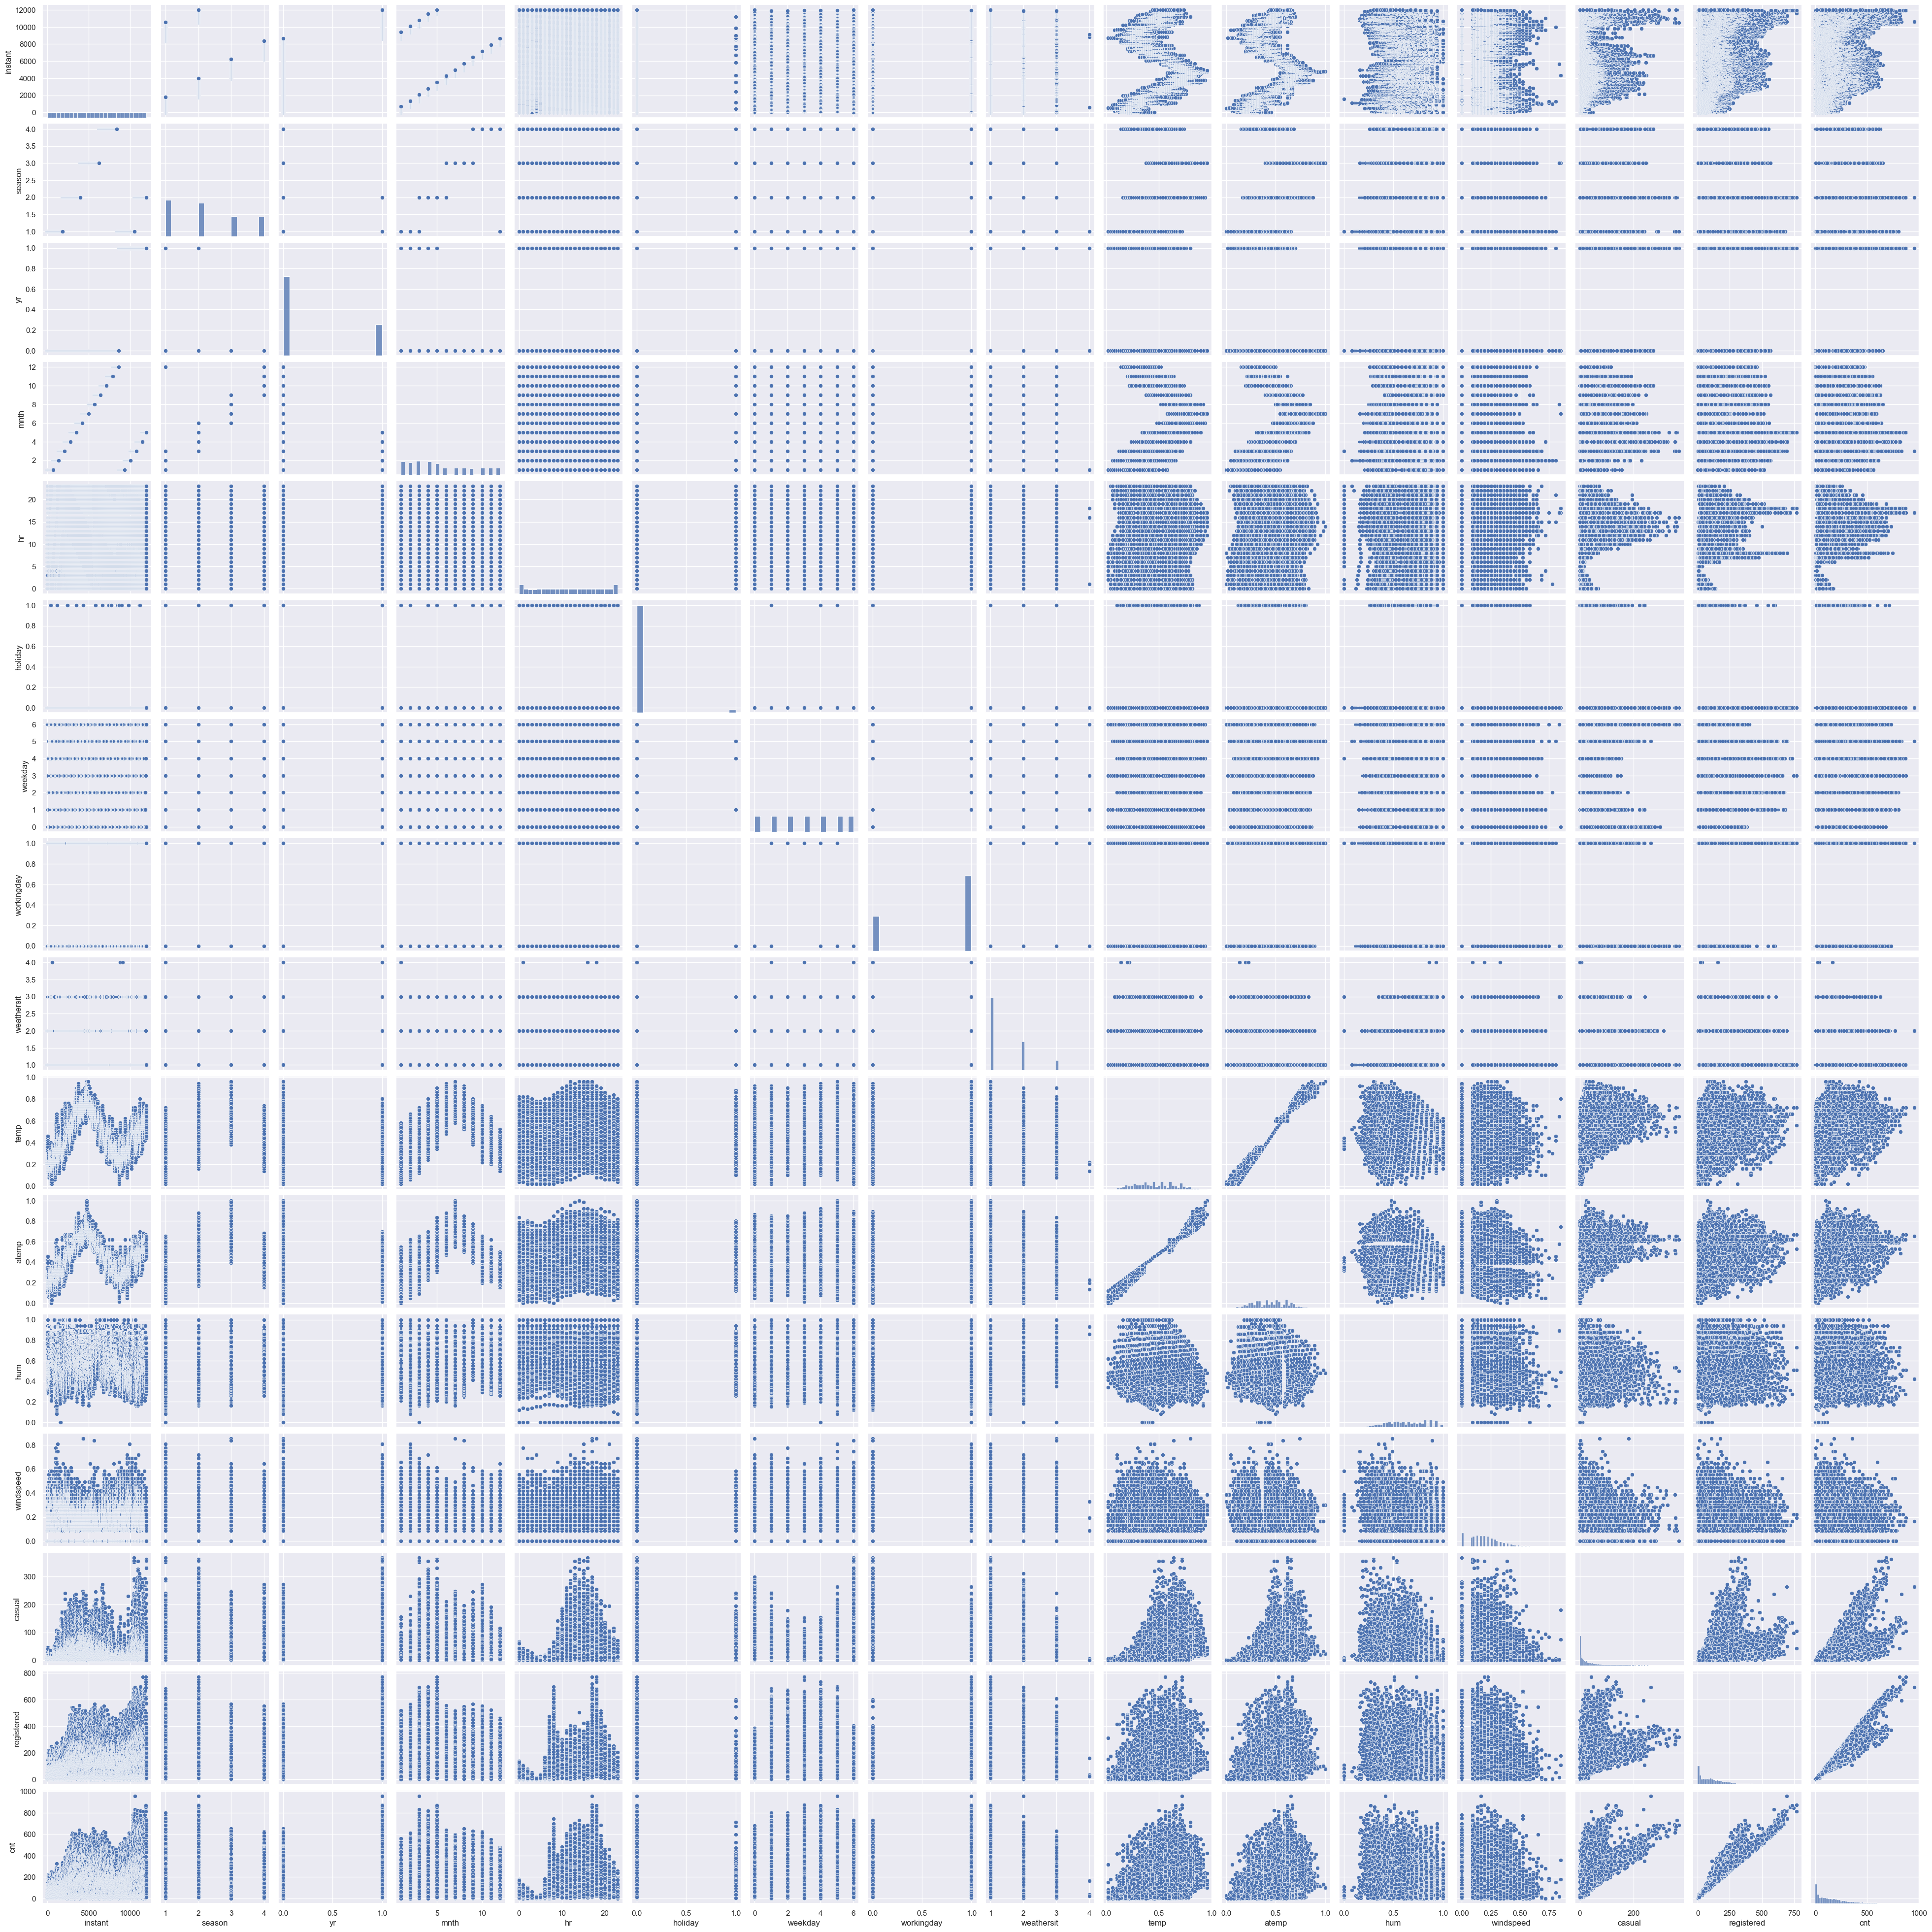

In [105]:
sns.pairplot(bike_train)

Al tratarse de una serie de tiempo observamos el moviemiento de los regsitros a lo largo de periodo comprendido de enero del 2011 a mayo 2012


<AxesSubplot:xlabel='dteday', ylabel='cnt'>

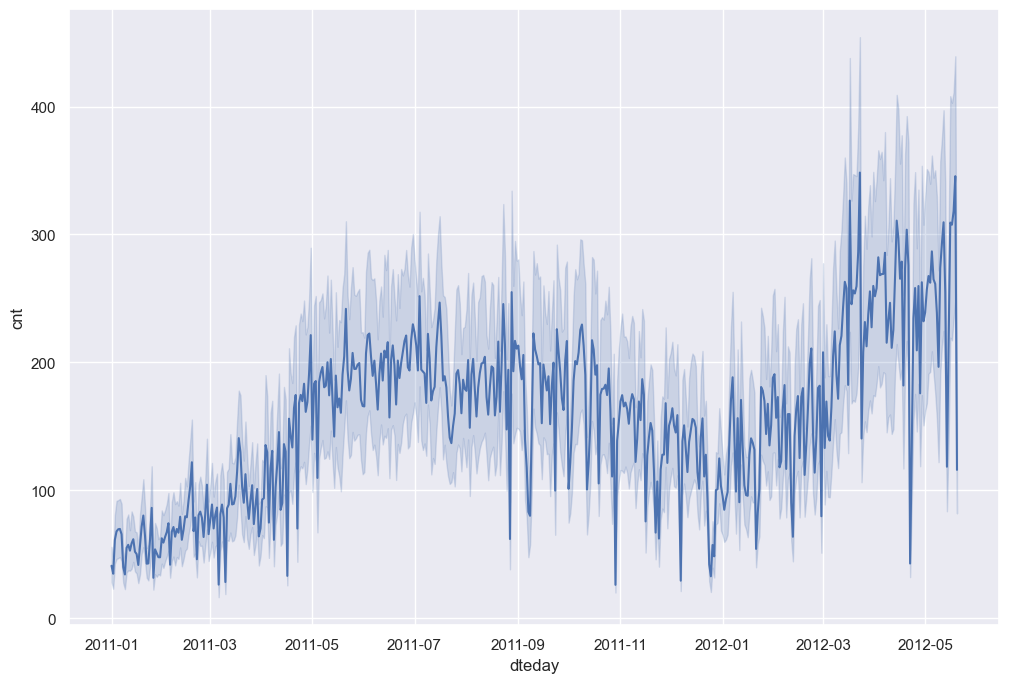

In [107]:
plt.figure(figsize=(12,8))
sns.lineplot(x='dteday', y= 'cnt', data=bike_train)

1. Distribución del total registros por estación 
season es una variable cualitativa ordinal, definida de la siguiente forma:
   1 primavera
   2 verano
   3 otoño
   4 invierno

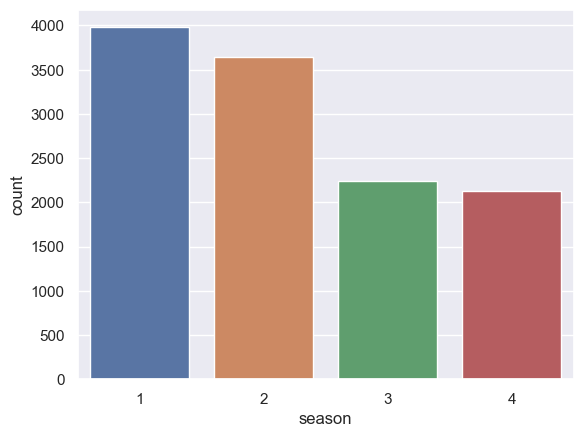

In [12]:
sns.countplot(x='season', data=bike_train)
plt.show()

Podemos observar que en primavera hay mas registros de renta de bicicletas

2. Distribucion de total de  registros por mes
mnth es un variable cualitativa ordinas que inicia en 1 para el mes de enero y termina en 12 para el mes de diciembre, los meses van en orden acendente dentro de ese rango.

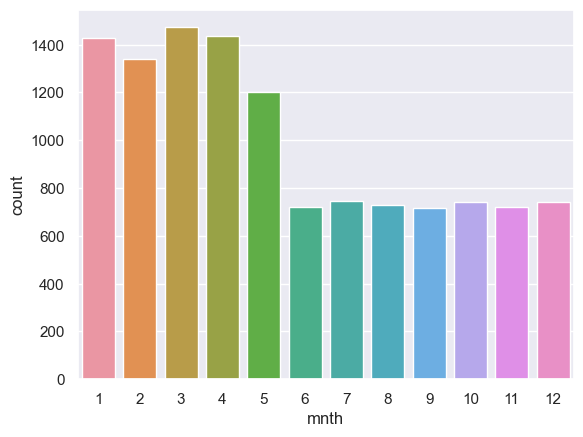

In [13]:
sns.countplot(x='mnth', data=bike_train)
plt.show()

Con las dos distribucuones anteriores confirmamos que efectivamente en primavera durante los meses de marzo, abril y mayo es cuando mas bicicletas se usan mas

3. Distribución del total de  registros por dia de la semana
weekday es un variable cualitativa ordinal que toma los valores de 0 a 6 siendo 0 el dia domingo y 6 el dia sabado, los dias restantes se enumeran en el orden ascendente segun la secuencia habitual de estos, dentro del rango antes indicado.

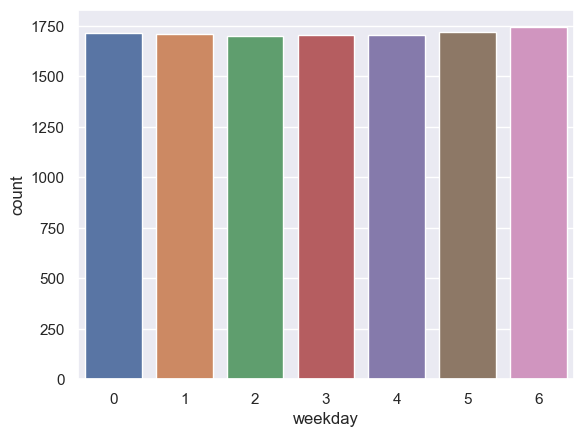

In [17]:
sns.countplot(x='weekday', data=bike_train)
plt.show()

Observamos que hay mayor cantidad de registros en los dias 5 y 6 pero el que muestra mayor incremento es el dia 6

4. Distribución del total de registros por día laboral.
workingday es una variable cualitativa nominal con los valores:
1 para día laboral
0 para dia no laboral

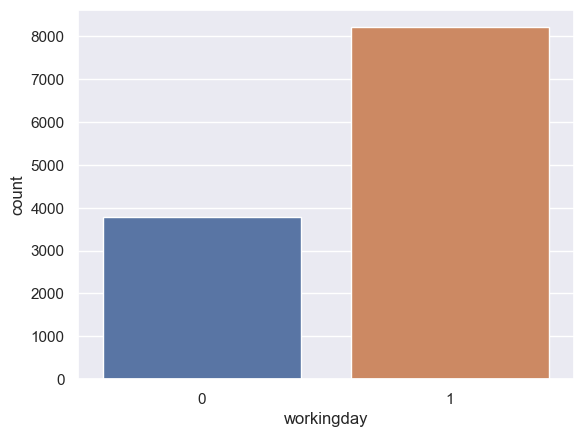

In [14]:
sns.countplot(x='workingday', data=bike_train)
plt.show()

Los dias laborales hay mayor cantidad de registros

4. Distribución del total de  registros según el estado del clima, la definición de esta variable esta indicada de la siguiente manera:
   1 despajado,algunas nubes o parcialmente nublado.
   2 neblina con nubes, neblina con nubes fragmentadas, neblina con algunas nubes o sólo neblina.
   3 nieve ligera, llovizna con tormenta eléctrica y nubes dispersas o llovizna con nubes dispersas.
   4 lluvia fuerte con granizos, tormenta eléctrica y neblina, o nieve con niebla.

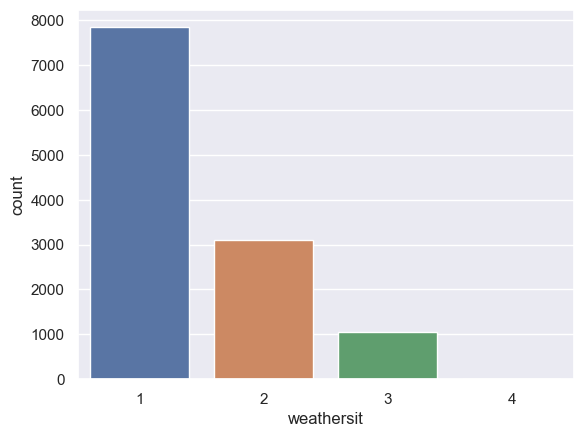

In [16]:
sns.countplot(x='weathersit', data=bike_train)
plt.show()

Los dias que estan depejados hay mayor cantidad de registros, en cambio los dias con lluvia fuerte no suelen haber registros

Generamos dos histogramas, uno con que muestra el numero de registros de los usuarios casuales y otro el numero de registro de usuarios que ya cuentan con registro

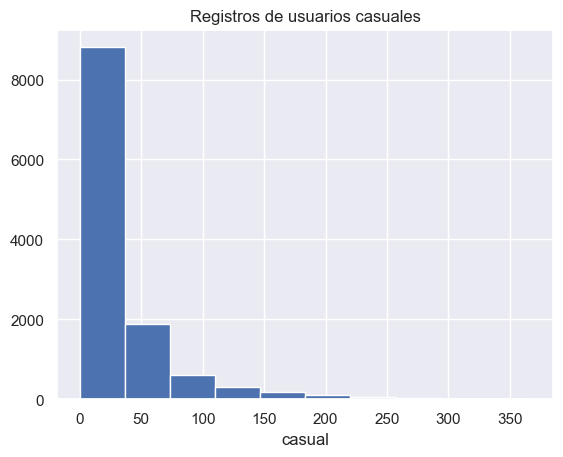

In [144]:
bike_train.casual.hist()
plt.title('Registros de usuarios casuales')
plt.xlabel('casual')
plt.show()

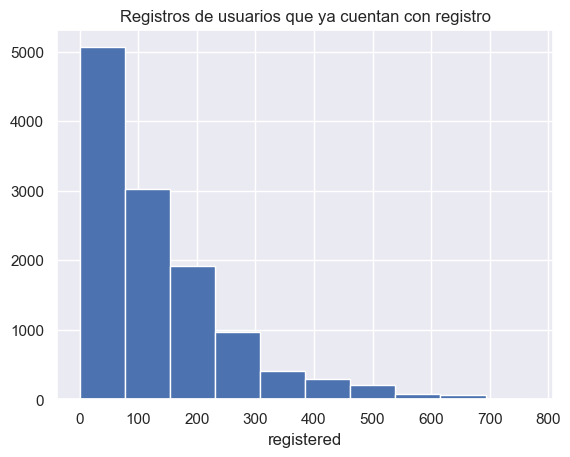

In [143]:
bike_train.registered.hist()
plt.title('Registros de usuarios que ya cuentan con registro')
plt.xlabel('registered')
plt.show()

In [132]:
df=bike_train.copy()
df.drop(columns='instant', inplace= True)
df

dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0     2011-01-01       1   0     1   0        0        6           0   
1     2011-01-01       1   0     1   1        0        6           0   
2     2011-01-01       1   0     1   2        0        6           0   
3     2011-01-01       1   0     1   3        0        6           0   
4     2011-01-01       1   0     1   4        0        6           0   
...          ...     ...  ..   ...  ..      ...      ...         ...   
11994 2012-05-19       2   1     5  23        0        6           0   
11995 2012-05-20       2   1     5   0        0        0           0   
11996 2012-05-20       2   1     5   1        0        0           0   
11997 2012-05-20       2   1     5   2        0        0           0   
11998 2012-05-20       2   1     5   3        0        0           0   

       weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0               1  0.24  0.2879  0.81     0.0000       3          13   16  
1               1  0.22  0.2727  0.80     0.0000       8          32   40  
2               1  0.22  0.2727  0.80     0.0000       5          27   32  
3               1  0.24  0.2879  0.75     0.0000       3          10   13  
4               1  0.24  0.2879  0.75     0.0000       0           1    1  
...           ...   ...     ...   ...        ...     ...         ...  ...  
11994           1  0.60  0.6212  0.56     0.1642      71         168  239  
11995           1  0.58  0.5455  0.53     0.1045      42         128  170  
11996           1  0.56  0.5303  0.52     0.0000      28         102  130  
11997           1  0.56  0.5303  0.52     0.0000      36          62   98  
11998           1  0.54  0.5152  0.56     0.0896      26          40   66  

[11999 rows x 16 columns]

Pasar fechas a numeros para trabajar con las fechas mas facil, esto se logra con toordinal

In [133]:
import datetime as dt
df['dteday']=df['dteday'].map(dt.datetime.toordinal)
df

dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0      734138       1   0     1   0        0        6           0           1   
1      734138       1   0     1   1        0        6           0           1   
2      734138       1   0     1   2        0        6           0           1   
3      734138       1   0     1   3        0        6           0           1   
4      734138       1   0     1   4        0        6           0           1   
...       ...     ...  ..   ...  ..      ...      ...         ...         ...   
11994  734642       2   1     5  23        0        6           0           1   
11995  734643       2   1     5   0        0        0           0           1   
11996  734643       2   1     5   1        0        0           0           1   
11997  734643       2   1     5   2        0        0           0           1   
11998  734643       2   1     5   3        0        0           0           1   

       temp   atemp   hum  windspeed  casual  registered  cnt  
0      0.24  0.2879  0.81     0.0000       3          13   16  
1      0.22  0.2727  0.80     0.0000       8          32   40  
2      0.22  0.2727  0.80     0.0000       5          27   32  
3      0.24  0.2879  0.75     0.0000       3          10   13  
4      0.24  0.2879  0.75     0.0000       0           1    1  
...     ...     ...   ...        ...     ...         ...  ...  
11994  0.60  0.6212  0.56     0.1642      71         168  239  
11995  0.58  0.5455  0.53     0.1045      42         128  170  
11996  0.56  0.5303  0.52     0.0000      28         102  130  
11997  0.56  0.5303  0.52     0.0000      36          62   98  
11998  0.54  0.5152  0.56     0.0896      26          40   66  

[11999 rows x 16 columns]

Separamos la variable independiente(dteday) y la variable dependiente(cnt)

In [146]:
X = df.dteday.values
y = df.registered.values
print(X.shape, y.shape)

(11999,) (11999,)


Realizamos el reshape para que la variable tenga el formato requerido por el modelo .

In [147]:
X = X.reshape(-1,1)
print(X.shape)

(11999, 1)


Separamos el train y el test

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8399, 1)
(3600, 1)
(8399,)
(3600,)


In [154]:
X_test

array([[734222],
       [734413],
       [734213],
       ...,
       [734535],
       [734300],
       [734406]], dtype=int64)

Se implementa y entrena el modelo y al final se imprime el resultado de su aprendizaje

In [149]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept = True)
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)
print(lr.rank_)

[0.2137562]
-156851.85278748177
1


Predecimos sobre los datos del train y del test

In [150]:
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred,squared=False))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred, squared=False))

Error en datos de train: 121.69014660495876
Error en datos de test: 119.75125551020727


In [151]:
print(y_train_pred)

[144.38284277 106.9755073  106.7617511  ... 123.43473491  82.8210564
 140.32147492]


In [152]:
print(y_test_pred)

[ 92.65384173 133.48127643  90.7300359  ... 159.55953316 109.32682553
 131.98498302]


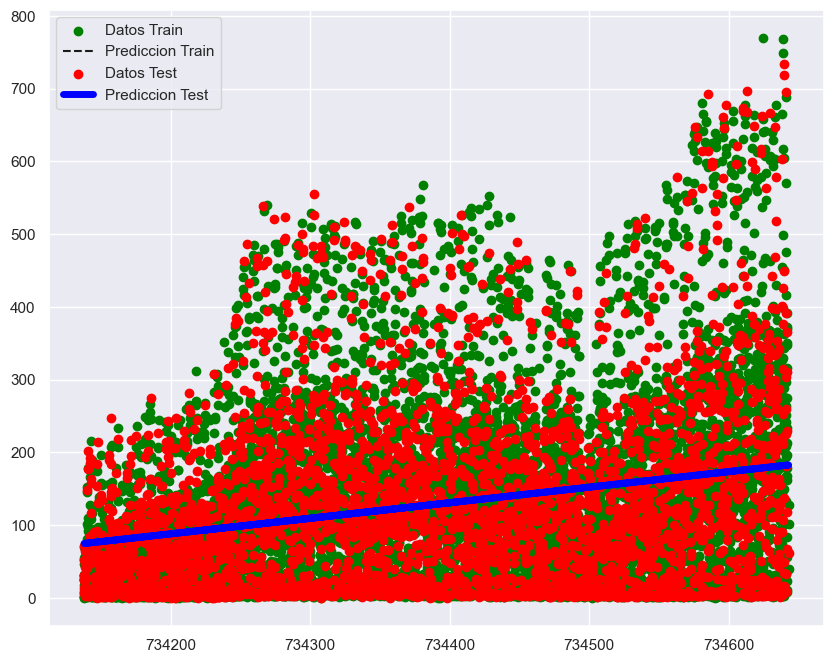

In [153]:
plt.figure(figsize = (10,8))

plt.scatter(X_train, y_train,  color='green', label = 'Datos Train')
plt.plot(X_train, y_train_pred, color='k', linestyle = '--', label = 'Prediccion Train')

plt.scatter(X_test, y_test,  color='red', label = 'Datos Test')
plt.plot(X_test, y_test_pred, color='blue', linewidth=5.0, label = 'Prediccion Test')

plt.legend()
plt.show()

leemos el archivo bike_test.xlsx para realizar la prediccion a partir de este nuevo dataset

In [155]:
bike_test=pd.read_excel("./bike_test.xlsx",sheet_name='Sheet1')
bike_test

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0       12000 2012-05-20       2   1     5   4        0        0           0   
1       12001 2012-05-20       2   1     5   5        0        0           0   
2       12002 2012-05-20       2   1     5   6        0        0           0   
3       12003 2012-05-20       2   1     5   7        0        0           0   
4       12004 2012-05-20       2   1     5   8        0        0           0   
...       ...        ...     ...  ..   ...  ..      ...      ...         ...   
5375    17375 2012-12-31       1   1    12  19        0        1           1   
5376    17376 2012-12-31       1   1    12  20        0        1           1   
5377    17377 2012-12-31       1   1    12  21        0        1           1   
5378    17378 2012-12-31       1   1    12  22        0        1           1   
5379    17379 2012-12-31       1   1    12  23        0        1           1   

      weathersit  temp   atemp   hum  windspeed  
0              1  0.52  0.5000  0.68     0.0896  
1              1  0.50  0.4848  0.72     0.1045  
2              1  0.50  0.4848  0.63     0.1343  
3              1  0.52  0.5000  0.68     0.1940  
4              1  0.56  0.5303  0.56     0.1642  
...          ...   ...     ...   ...        ...  
5375           2  0.26  0.2576  0.60     0.1642  
5376           2  0.26  0.2576  0.60     0.1642  
5377           1  0.26  0.2576  0.60     0.1642  
5378           1  0.26  0.2727  0.56     0.1343  
5379           1  0.26  0.2727  0.65     0.1343  

[5380 rows x 14 columns]

Realizamos una copia solo como respaldo para no perder el archivo original

In [156]:
df_test_b=bike_test.copy()
df_test_b

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0       12000 2012-05-20       2   1     5   4        0        0           0   
1       12001 2012-05-20       2   1     5   5        0        0           0   
2       12002 2012-05-20       2   1     5   6        0        0           0   
3       12003 2012-05-20       2   1     5   7        0        0           0   
4       12004 2012-05-20       2   1     5   8        0        0           0   
...       ...        ...     ...  ..   ...  ..      ...      ...         ...   
5375    17375 2012-12-31       1   1    12  19        0        1           1   
5376    17376 2012-12-31       1   1    12  20        0        1           1   
5377    17377 2012-12-31       1   1    12  21        0        1           1   
5378    17378 2012-12-31       1   1    12  22        0        1           1   
5379    17379 2012-12-31       1   1    12  23        0        1           1   

      weathersit  temp   atemp   hum  windspeed  
0              1  0.52  0.5000  0.68     0.0896  
1              1  0.50  0.4848  0.72     0.1045  
2              1  0.50  0.4848  0.63     0.1343  
3              1  0.52  0.5000  0.68     0.1940  
4              1  0.56  0.5303  0.56     0.1642  
...          ...   ...     ...   ...        ...  
5375           2  0.26  0.2576  0.60     0.1642  
5376           2  0.26  0.2576  0.60     0.1642  
5377           1  0.26  0.2576  0.60     0.1642  
5378           1  0.26  0.2727  0.56     0.1343  
5379           1  0.26  0.2727  0.65     0.1343  

[5380 rows x 14 columns]

convertimos la columna dteday a numeros como lo hicimos en la dataset anterior con ayuda de toordial

In [157]:
df_test_b['dteday']=df_test_b['dteday'].map(dt.datetime.toordinal)
df_test_b

instant  dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0       12000  734643       2   1     5   4        0        0           0   
1       12001  734643       2   1     5   5        0        0           0   
2       12002  734643       2   1     5   6        0        0           0   
3       12003  734643       2   1     5   7        0        0           0   
4       12004  734643       2   1     5   8        0        0           0   
...       ...     ...     ...  ..   ...  ..      ...      ...         ...   
5375    17375  734868       1   1    12  19        0        1           1   
5376    17376  734868       1   1    12  20        0        1           1   
5377    17377  734868       1   1    12  21        0        1           1   
5378    17378  734868       1   1    12  22        0        1           1   
5379    17379  734868       1   1    12  23        0        1           1   

      weathersit  temp   atemp   hum  windspeed  
0              1  0.52  0.5000  0.68     0.0896  
1              1  0.50  0.4848  0.72     0.1045  
2              1  0.50  0.4848  0.63     0.1343  
3              1  0.52  0.5000  0.68     0.1940  
4              1  0.56  0.5303  0.56     0.1642  
...          ...   ...     ...   ...        ...  
5375           2  0.26  0.2576  0.60     0.1642  
5376           2  0.26  0.2576  0.60     0.1642  
5377           1  0.26  0.2576  0.60     0.1642  
5378           1  0.26  0.2727  0.56     0.1343  
5379           1  0.26  0.2727  0.65     0.1343  

[5380 rows x 14 columns]

obtenermmos los nuevos valores sobre los que se va a predecir, es decir los valores para la variable independiente, a partir del ultimo dataset cargado

In [159]:
x_test2=df_test_b.dteday.values

In [160]:
print(x_test2.shape)

(5380,)


realizamos el reshape para contar con el formato que que requiere el modelo a implementar

In [162]:
x_test2=x_test2.reshape(-1,1)
print(x_test2.shape)

(5380, 1)


Realizamos la predicción

In [163]:
y_test_pred = lr.predict(x_test2)
y_test_pred

array([182.64520305, 182.64520305, 182.64520305, ..., 230.74034864,
       230.74034864, 230.74034864])

In [164]:
df_predic=pd.DataFrame(y_test_pred)
df_predic


0
0     182.645203
1     182.645203
2     182.645203
3     182.645203
4     182.645203
...          ...
5375  230.740349
5376  230.740349
5377  230.740349
5378  230.740349
5379  230.740349

[5380 rows x 1 columns]

In [165]:
df_predic.rename(columns={0:'pred'},inplace=True)
df_predic

pred
0     182.645203
1     182.645203
2     182.645203
3     182.645203
4     182.645203
...          ...
5375  230.740349
5376  230.740349
5377  230.740349
5378  230.740349
5379  230.740349

[5380 rows x 1 columns]

In [166]:
df_predic.to_csv("MAKACT.csv",index=False)